In [1]:
# Wetterdaten laden und erkunden
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/wetter.csv"
df = pd.read_csv(url)

# Datenübersicht
print("Erste Zeilen des Datensatzes:")
print(df.head())
print("\nDataframe Info:")
print(df.info())
print("\nStatistische Zusammenfassung:")
print(df.describe())

Erste Zeilen des Datensatzes:
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                2601 non-null   object 
 1   Bewoelkung           2591 non-null   float64
 2   Temperatur           2601 non-null   float64
 3   Windgeschwindigkeit  2601 non-null   int64  
 4   Wettercode           1932 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 101.7+ KB
None

S

## 1. Streudiagramm (Scatter Plot)
Zusammenhang zwischen Temperatur und Windgeschwindigkeit

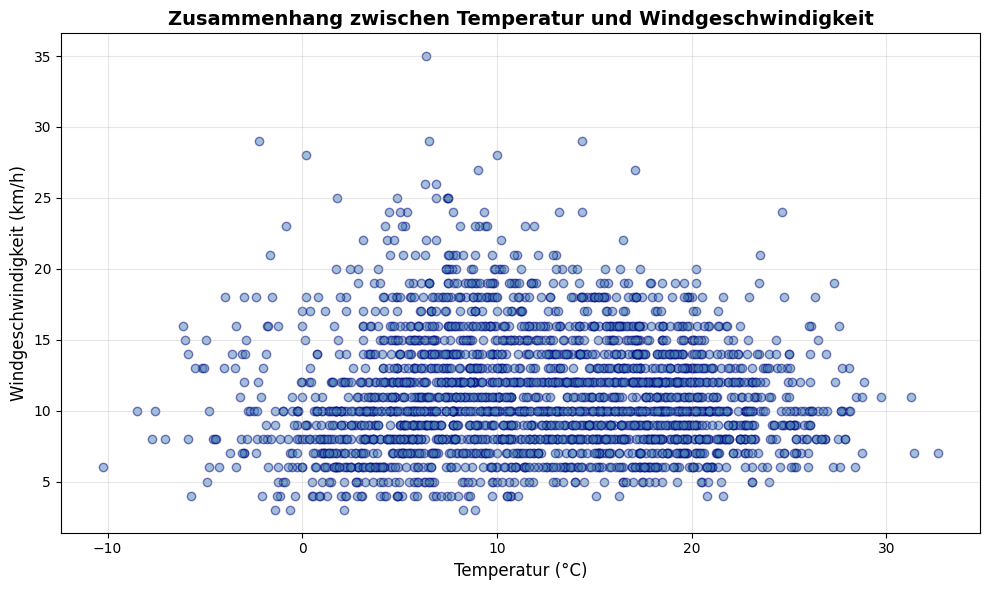

Korrelation zwischen Temperatur und Windgeschwindigkeit:
-0.007


In [2]:
# Streudiagramm: Temperatur vs. Windgeschwindigkeit
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperatur'], df['Windgeschwindigkeit'], alpha=0.5, c='steelblue', edgecolors='navy')
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Windgeschwindigkeit (km/h)', fontsize=12)
plt.title('Zusammenhang zwischen Temperatur und Windgeschwindigkeit', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Korrelation zwischen Temperatur und Windgeschwindigkeit:")
print(f"{df['Temperatur'].corr(df['Windgeschwindigkeit']):.3f}")

## 2. Histogramm
Verteilung der Temperaturen im Datensatz

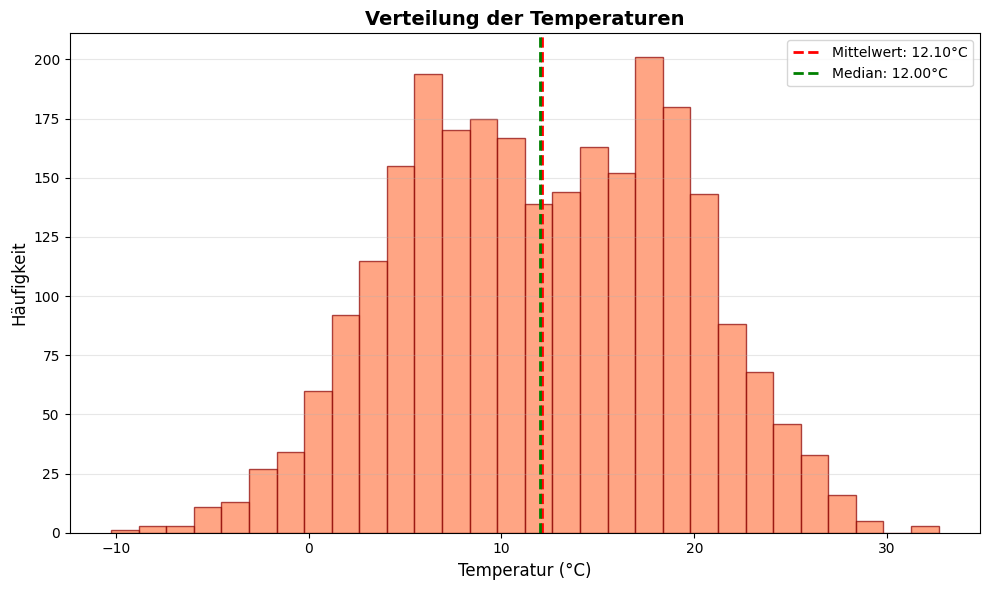

Mittelwert: 12.10°C
Median: 12.00°C
Standardabweichung: 7.17°C


In [3]:
# Histogramm: Verteilung der Temperaturen
plt.figure(figsize=(10, 6))
plt.hist(df['Temperatur'], bins=30, color='coral', edgecolor='darkred', alpha=0.7)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.title('Verteilung der Temperaturen', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.axvline(df['Temperatur'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mittelwert: {df["Temperatur"].mean():.2f}°C')
plt.axvline(df['Temperatur'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Temperatur"].median():.2f}°C')
plt.legend()
plt.tight_layout()
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mittelwert: {df['Temperatur'].mean():.2f}°C")
print(f"Median: {df['Temperatur'].median():.2f}°C")
print(f"Standardabweichung: {df['Temperatur'].std():.2f}°C")

## 3. Balkendiagramm (Bar Chart)
Durchschnittliche Temperatur nach Monat

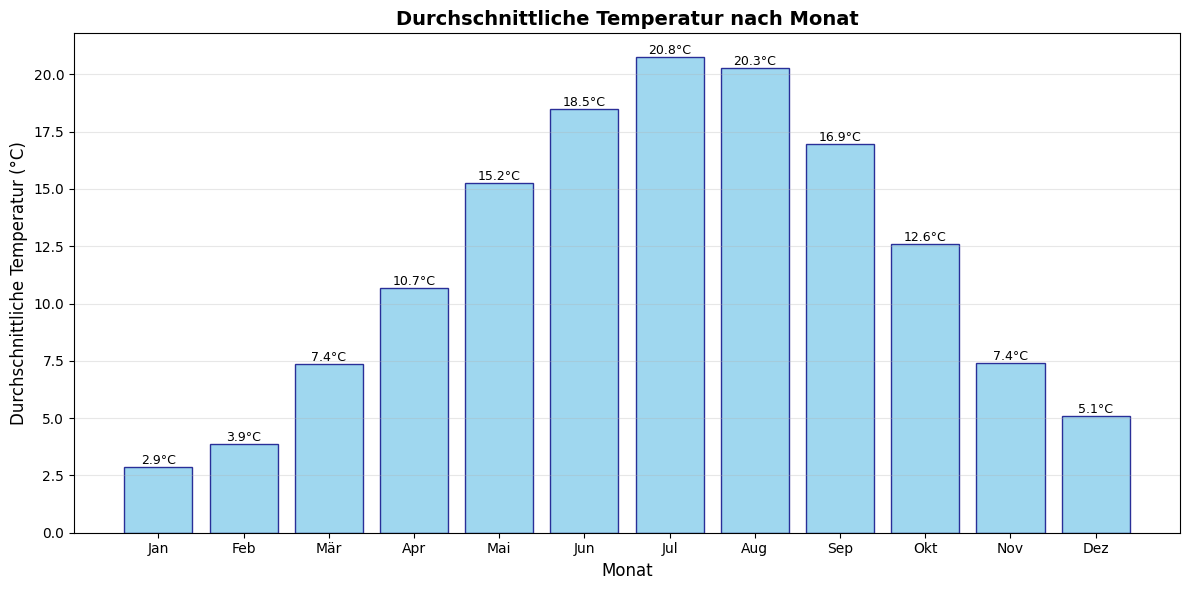

Durchschnittliche Temperatur pro Monat:
Jan: 2.86°C
Feb: 3.88°C
Mär: 7.36°C
Apr: 10.68°C
Mai: 15.24°C
Jun: 18.48°C
Jul: 20.75°C
Aug: 20.28°C
Sep: 16.94°C
Okt: 12.61°C
Nov: 7.40°C
Dez: 5.10°C


In [4]:
# Balkendiagramm: Durchschnittliche Temperatur nach Monat
# Datum in datetime umwandeln und Monat extrahieren
df['Datum'] = pd.to_datetime(df['Datum'])
df['Monat'] = df['Datum'].dt.month

# Durchschnittliche Temperatur pro Monat berechnen
monatliche_temp = df.groupby('Monat')['Temperatur'].mean()

# Monatsnamen für bessere Lesbarkeit
monate = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

plt.figure(figsize=(12, 6))
bars = plt.bar(monatliche_temp.index, monatliche_temp.values, color='skyblue', edgecolor='navy', alpha=0.8)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Durchschnittliche Temperatur (°C)', fontsize=12)
plt.title('Durchschnittliche Temperatur nach Monat', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), monate)
plt.grid(True, alpha=0.3, axis='y')

# Werte über den Balken anzeigen
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}°C',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Durchschnittliche Temperatur pro Monat:")
for monat, temp in monatliche_temp.items():
    print(f"{monate[monat-1]}: {temp:.2f}°C")